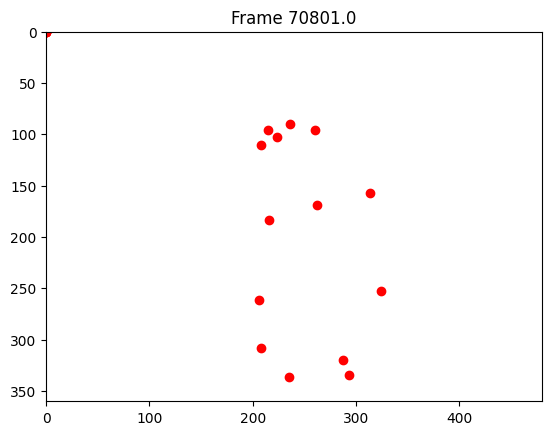

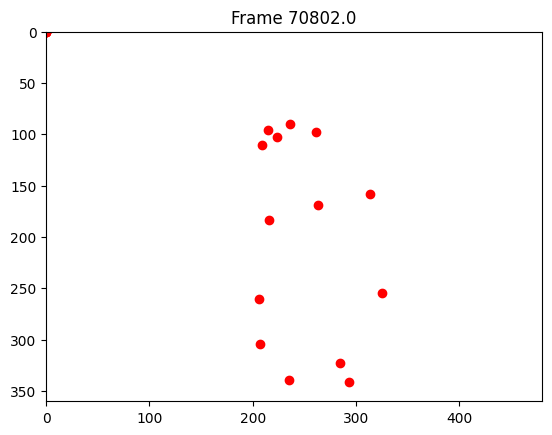

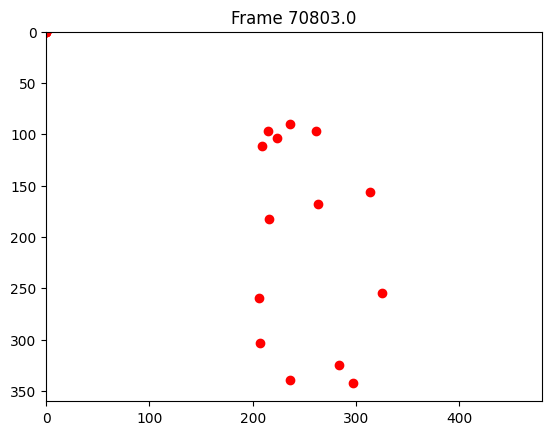

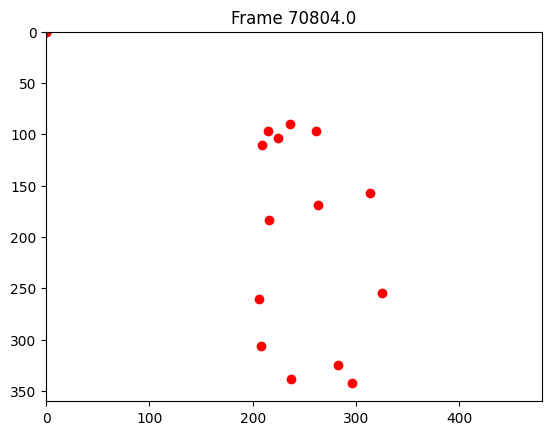

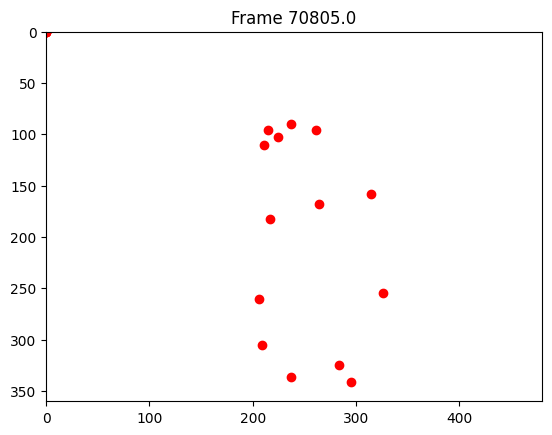

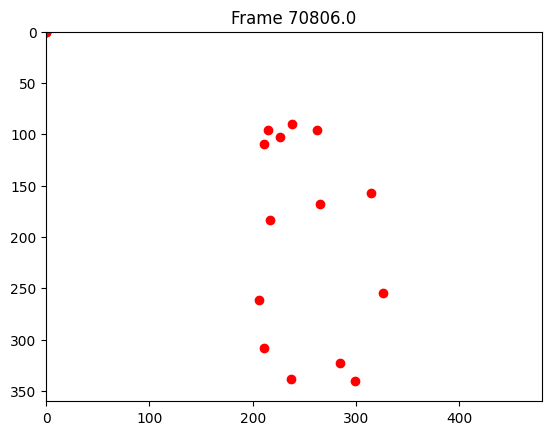

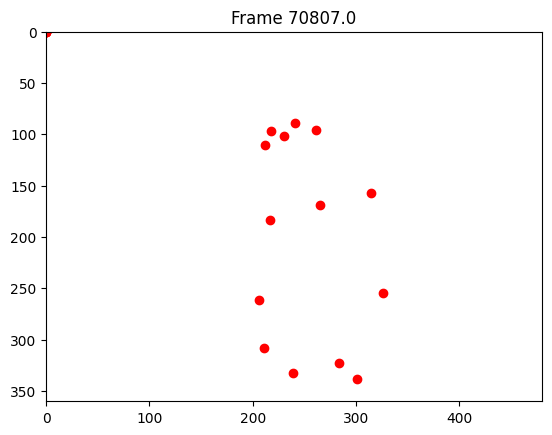

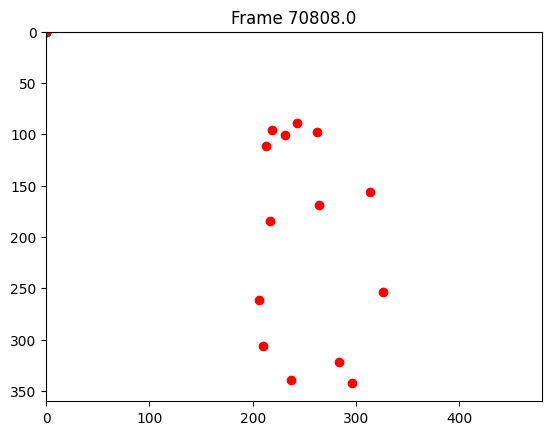

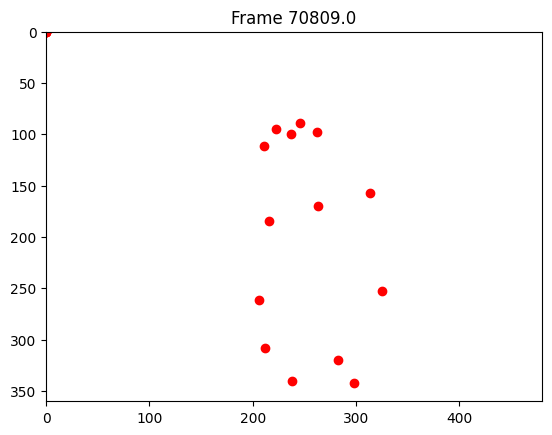

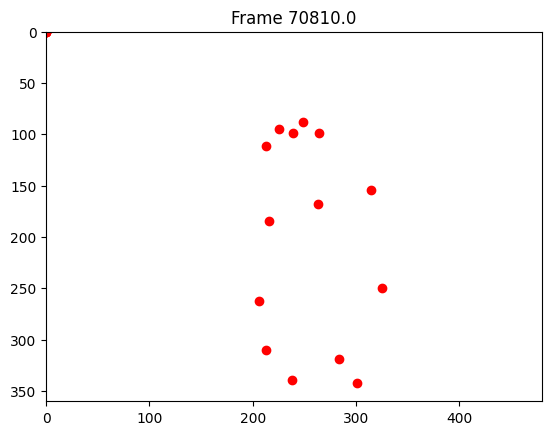

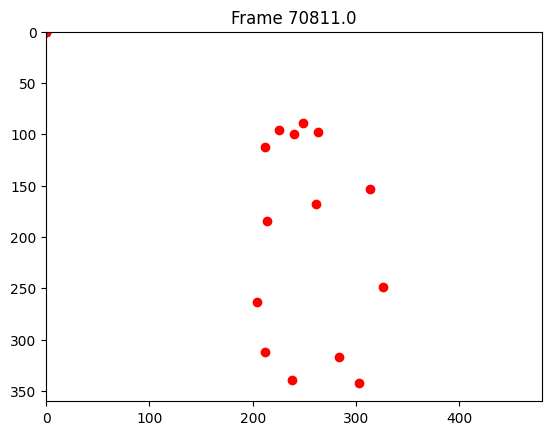

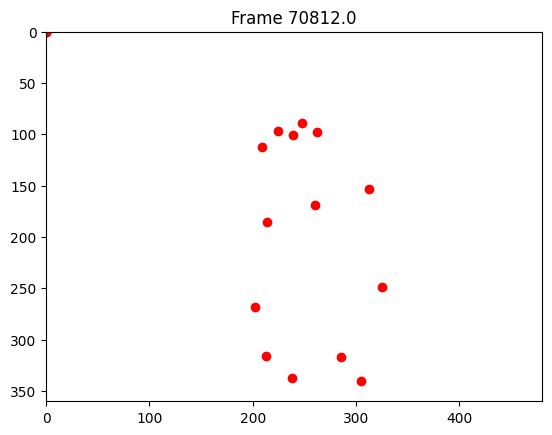

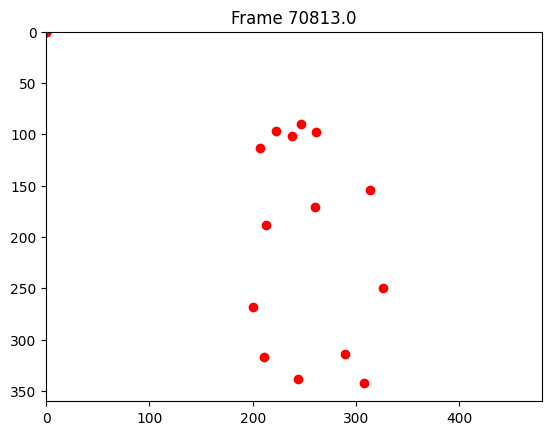

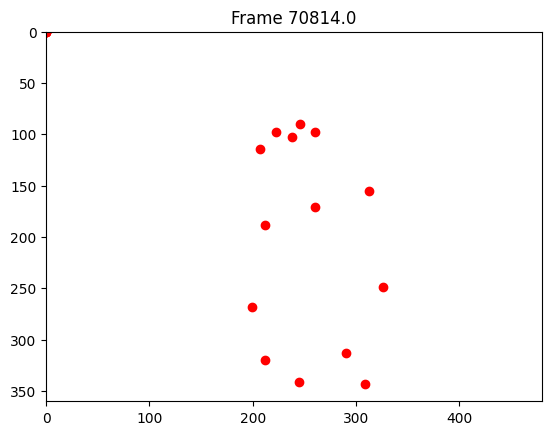

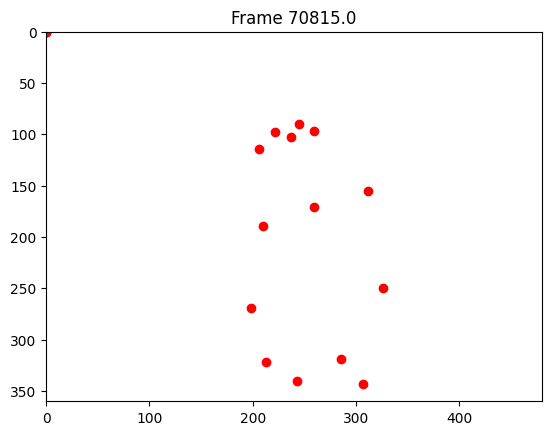

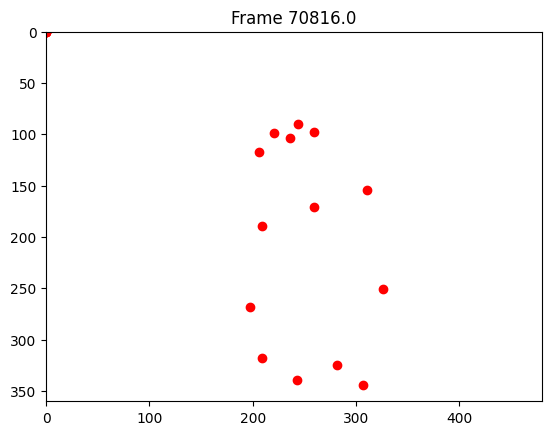

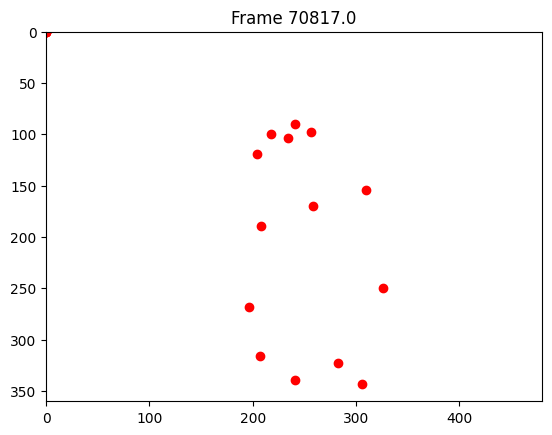

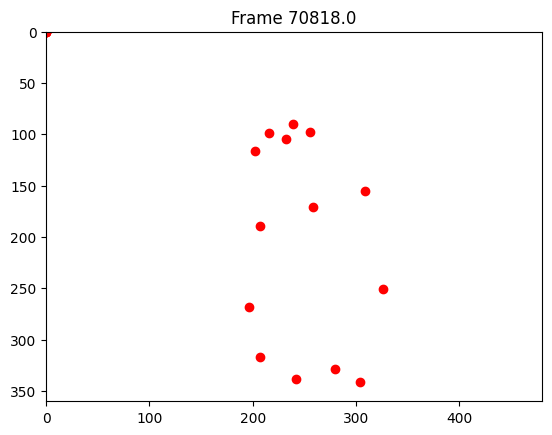

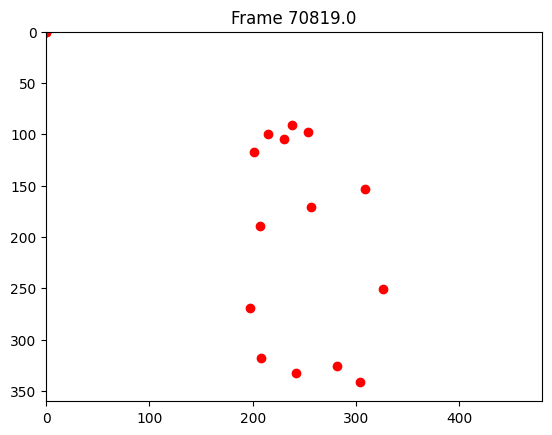

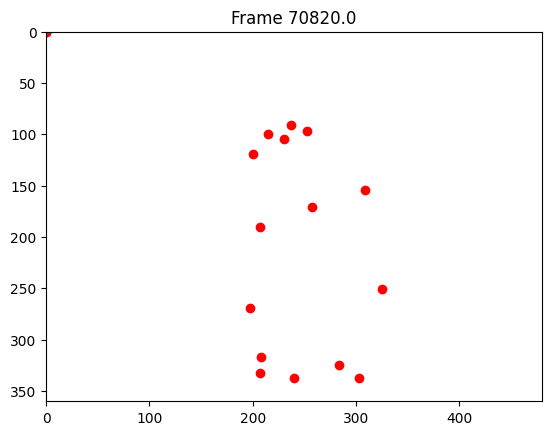

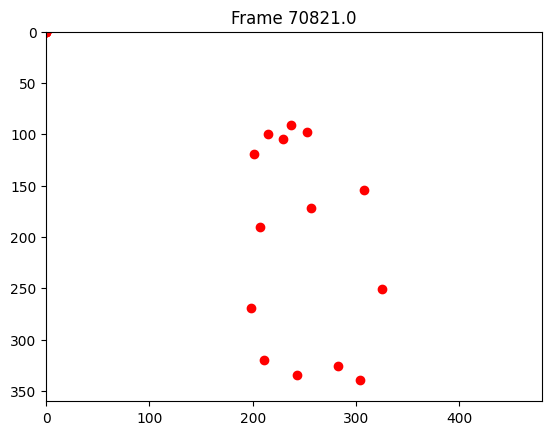

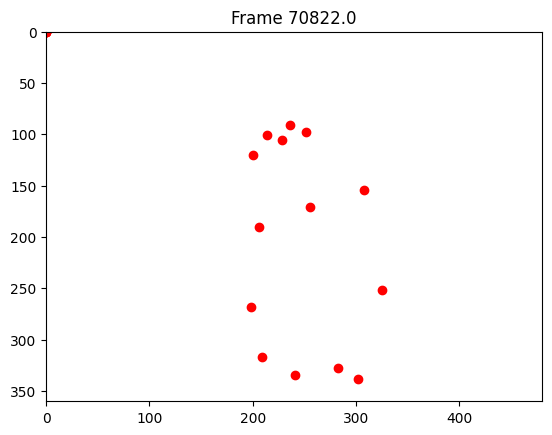

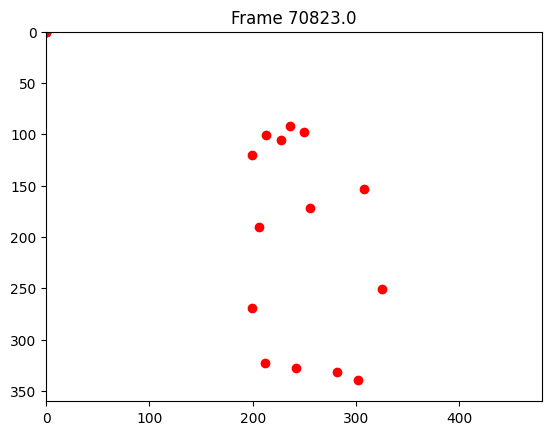

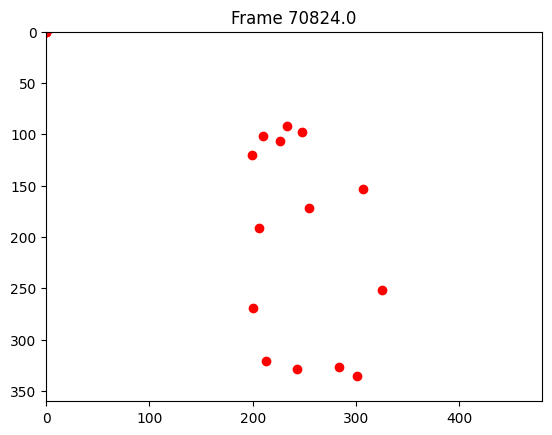

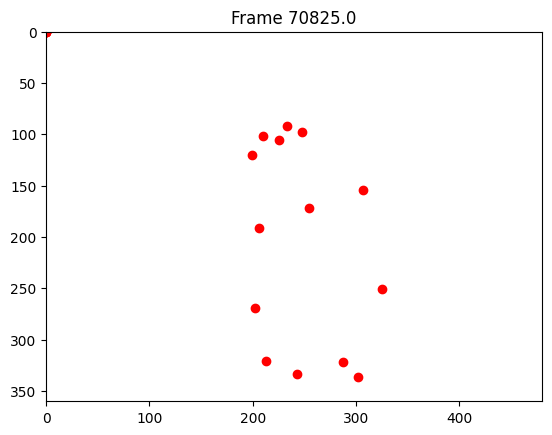

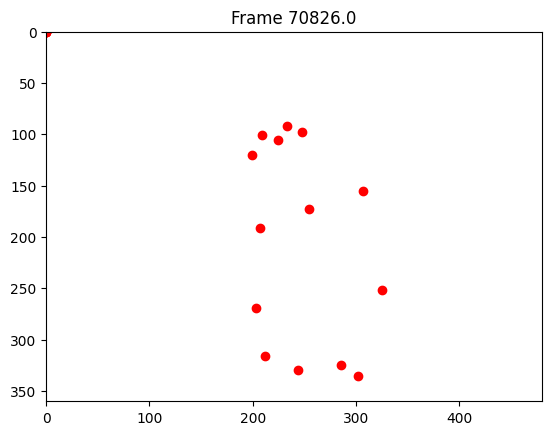

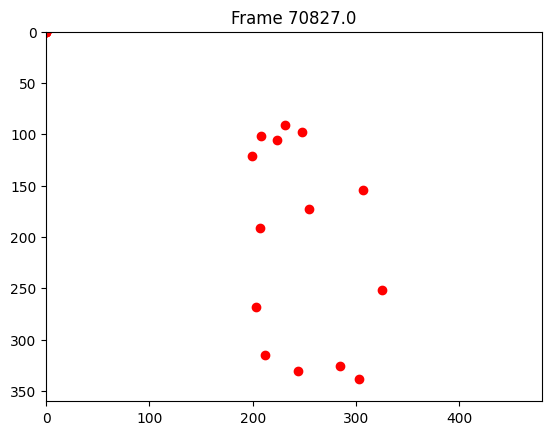

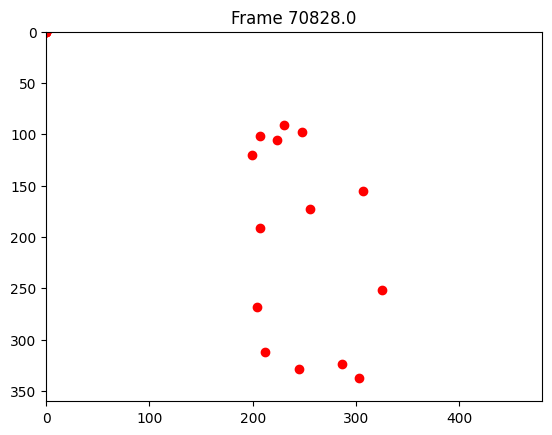

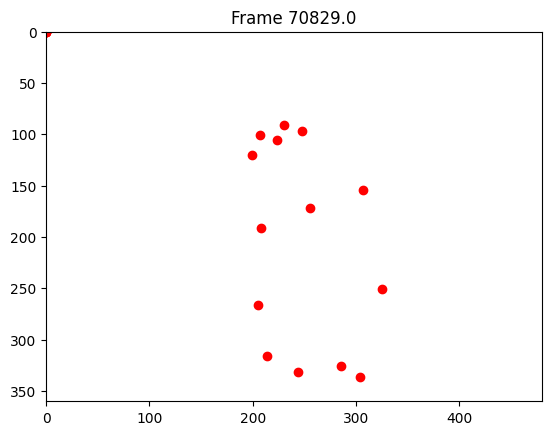

KeyboardInterrupt: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load(r"D:\BoLD\BOLD_public\joints\003\_7oWZq_s_Sk.mp4\0359.npy")

for frame in data:
    keypoints = frame[2:].reshape(-1, 3) 
    x = keypoints[:, 0]
    y = keypoints[:, 1]

    plt.figure()
    plt.scatter(x, y, marker='o', color='red')
    plt.xlim(0, 480)  
    plt.ylim(0, 360)  
    plt.gca().invert_yaxis() 
    plt.title(f'Frame {frame[0]}')
    plt.show()


In [8]:
import numpy as np
import csv
import pandas as pd

data = np.load(r"E:\emotion_joints\Happiness\0000.npy")

coco_parts = {
    0: "Nose", 1: "Neck", 2: "RShoulder", 3: "RElbow", 4: "RWrist",
    5: "LShoulder", 6: "LElbow", 7: "LWrist", 8: "RHip", 9: "RKnee",
    10: "RAnkle", 11: "LHip", 12: "LKnee", 13: "LAnkle", 14: "REye",
    15: "LEye", 16: "REar", 17: "LEar"
}

with open('output5.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)

    header = ['FrameNumber', 'PersonID'] + [coco_parts[i] + '_x' for i in range(18)] + [coco_parts[i] + '_y' for i in range(18)] + [coco_parts[i] + '_conf' for i in range(18)]
    csvwriter.writerow(header)
    
    for row in data:
        frame_number = int(row[0])
        person_id = int(row[1])
        poses = row[2:].reshape(18, 3)
        csv_row = [frame_number, person_id]

        for pose in poses:
            csv_row.extend(pose)

        csvwriter.writerow(csv_row)
print("CSV conversion complete.")


CSV conversion complete.


In [1]:
import os 

dir = r"E:\emotion_joints_csv"
emotions = ["Peace", "Affection", "Esteem", "Anticipation", "Engagement", "Confidence", 
                    "Happiness", "Pleasure", "Excitement", "Surprise", "Sympathy", "Doubt/Confusion", 
                    "Disconnect", "Fatigue", "Embarrassment", "Yearning", "Disapproval", "Aversion", 
                    "Annoyance", "Anger", "Sensitivity", "Sadness", "Disquietment", "Fear", "Pain", 
                    "Suffering"]

for i in emotions:
    path = os.path.join(dir, i)

    if not os.path.exists(path):
        os.makedirs(path)

In [2]:
import os
import numpy as np
import pandas as pd

root_dir = r"E:\emotion_joints"
output_root_dir = r"E:\emotion_joints_csv"

for folder_name in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder_name)

    if os.path.isdir(folder_path):
        print(f"Processing folder: {folder_name}")
   
        output_folder_path = os.path.join(output_root_dir, folder_name)
        os.makedirs(output_folder_path, exist_ok=True)

        for npy_file in os.listdir(folder_path):
            if npy_file.endswith('.npy'):
                npy_file_path = os.path.join(folder_path, npy_file)
                np_data = np.load(npy_file_path)
                df = pd.DataFrame(np_data)
                
                csv_file_name = os.path.splitext(npy_file)[0] + '.csv'
                csv_file_path = os.path.join(output_folder_path, csv_file_name)
                
                df.to_csv(csv_file_path, index=False)
                
                print(f"Converted {npy_file} to {csv_file_name} in {folder_name}")
                
print("Conversion complete.")


C:\Users\John Christopher\AppData\Local\Temp\ipykernel_3708\1120430083.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Processing folder: Affection
   Converted 0000.npy to 0000.csv in Affection
   Converted 0002.npy to 0002.csv in Affection
   Converted 0003.npy to 0003.csv in Affection
   Converted 0004.npy to 0004.csv in Affection
   Converted 0009.npy to 0009.csv in Affection
   Converted 0010.npy to 0010.csv in Affection
   Converted 0011.npy to 0011.csv in Affection
   Converted 0014.npy to 0014.csv in Affection
   Converted 0018.npy to 0018.csv in Affection
   Converted 0020.npy to 0020.csv in Affection
   Converted 0024.npy to 0024.csv in Affection
   Converted 0025.npy to 0025.csv in Affection
   Converted 0026.npy to 0026.csv in Affection
   Converted 0027.npy to 0027.csv in Affection
   Converted 0031.npy to 0031.csv in Affection
   Converted 0033.npy to 0033.csv in Affection
   Converted 0035.npy to 0035.csv in Affection
   Converted 0036.npy to 0036.csv in Affection
   Converted 0037.npy to 0037.csv in Affection
   Converted 0038.npy to 0038.csv in Affection
   Converted 0039.npy to 0039.c

In [5]:
def count_rows_and_columns(file_path):
    row_count = 0
    column_count = 0

    with open(file_path, 'r') as file:
        for line in file:
            row_count += 1
            columns = line.strip().split('\t')  
            if row_count == 1:  
                column_count = len(columns)

    print(f"Number of rows: {row_count}")
    print(f"Number of columns: {column_count}")
file_path = r"D:\THESIS 2.0\resting.txt"
count_rows_and_columns(file_path)

Number of rows: 1002
Number of columns: 1


In [6]:
import numpy as np

def count_rows_and_columns_npy(file_path):
    try:
        data = np.load(file_path)
        shape = data.shape
        rows, cols = shape[0], shape[1] if len(shape) > 1 else 1

        print(f"Number of rows: {rows}")
        print(f"Number of columns: {cols}")

    except IOError:
        print(f"Error: Unable to load file {file_path}")

file_path = r"E:\emotion_joints\Affection\0000.npy"
count_rows_and_columns_npy(file_path)


Number of rows: 627
Number of columns: 56
